# Neural Networks (in action)

--- 

### Topics in Economtrics and Statistics

> Summer 2020, Tim Mensinger

## The Data

We consider the classic handwritten digit recognition problem on the [MNIST](http://yann.lecun.com/exdb/mnist/) data set. The data set contains 70,000 images and respective labels (0, ..., 9). Each image is defined by a 28x28 matrix with entries corresponding to gray-scale values in [0, 1]. The data is split into a training (60,000 samples) and testing (10,000 samples) set.

> **Note:**
> The features (images) are standardized before training the model. The testing data is standardized using the mean and standard deviation of the training data, since, strictly speaking, this is already part of model step.   

In [1]:
from nnet.data import get_mnist_data
from nnet.data import get_batch
from nnet.data import Data

from nnet.plotting import plot_examples
from nnet.plotting import plot_performance

In [2]:
data = get_mnist_data()

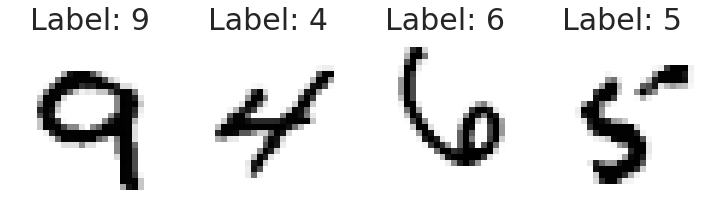

In [3]:
plot_examples(data.train)

## The Network

We build a plain vanilla [multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) network. The input dimension is a vector of all pixels (28 ** 2) and the output dimension is a 10 dimensional vector, corresponding to a [one-hot encoding](https://en.wikipedia.org/wiki/One-hot#Machine_learning_and_statistics) of the labels. For this project we choose two hidden layers, each with 28 neurons. This gives us a total number of parameters of 23,082. For comparison, inversion of a 25,000 by 25,000 matrix consumes ~5GB memory.

> **Note:**
> Choosing the hidden layers, i.e. the network structure, is a science in itself, and sometimes even considered as an art, rather than a science. 

A brilliant overview of different solutions is found in the respective [Kaggle competition](https://www.kaggle.com/competitions/digit-recognizer). [State-of-the-art solutions](https://www.kaggle.com/code/cdeotte/25-million-images-0-99757-mnist?scriptVersionId=73454105) can achieve a test accuracy of 99.757%. These methods often combine two powerful ideas. First, they use some form of data augmentation to expand the training set and robustify their results. And second, they utilize ideas from classical statistics to regularize the model. Combined, this allows them to build huge models without overfitting.

### Build the Network

In [4]:
from nnet.network import build_network
from tqdm.auto import tqdm

import jax.numpy as jnp

In [5]:
image_dim = 28  # number of pixels
structure = [image_dim ** 2, 28, 28, 10]

In [14]:
network = build_network(
    data,
    structure=structure,
    loss_type="mean_square",
    activation_type="sigmoid",
    algorithm="sgd",
    tqdm=tqdm,
)

In [15]:
result = network.fit(n_epochs=100, batch_size=1000)

Training:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 2:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 6:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 7:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 8:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 9:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 10:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 11:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 12:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 13:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 14:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 15:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 16:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 17:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 18:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 19:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 20:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 21:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 22:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 23:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 24:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 25:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 26:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 27:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 28:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 29:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 30:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 31:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 32:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 33:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 34:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 35:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 36:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 37:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 38:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 39:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 40:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 41:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 42:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 43:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 44:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 45:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 46:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 47:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 48:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 49:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 50:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 51:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 52:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 53:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 54:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 55:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 56:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 57:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 58:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 59:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 60:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 61:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 62:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 63:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 64:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 65:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 66:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 67:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 68:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 69:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 70:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 71:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 72:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 73:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 74:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 75:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 76:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 77:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 78:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 79:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 80:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 81:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 82:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 83:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 84:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 85:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 86:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 87:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 88:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 89:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 90:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 91:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 92:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 93:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 94:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 95:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 96:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 97:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 98:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 99:   0%|          | 0/60 [00:00<?, ?it/s]

### Performance Log

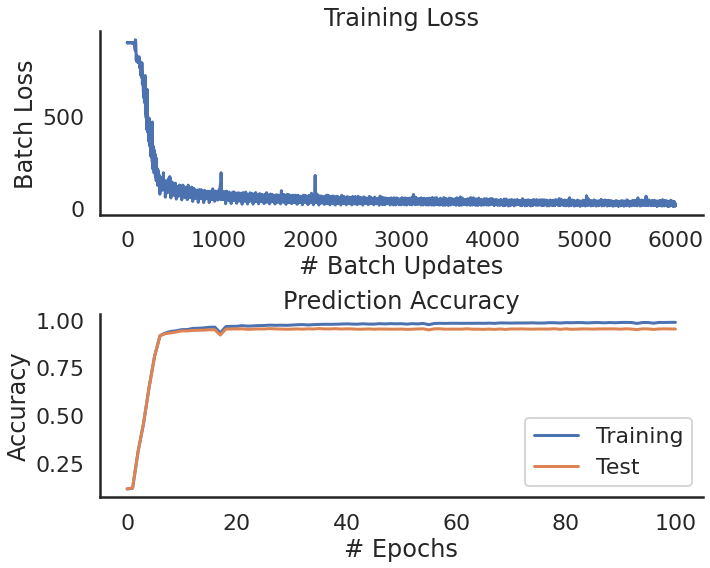

In [16]:
plot_performance(result.log)

### Predict Test Labels

In [17]:
pred = network.predict(result.params, data.test.images)

### Mislabeled

In [18]:
mislabeled = f"Mislabeled on test set: {(1 - result.log.test[-1]) * 100:.2f} %"
mislabeled

'Mislabeled on test set: 4.86 %'

In [19]:
_data = {
    name: Data(
        images=data.test.images[mask], 
        labels=data.test.labels[mask], 
        predictions=pred[mask]
    )
    for name, mask in zip(["wrong", "correct"], [pred != data.test.labels, pred == data.test.labels])
}

### Mislabeled Example

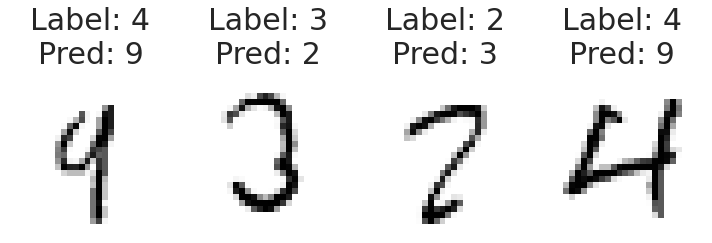

In [32]:
plot_examples(_data["wrong"])

---
---
---

### Correctly Labeled Examples

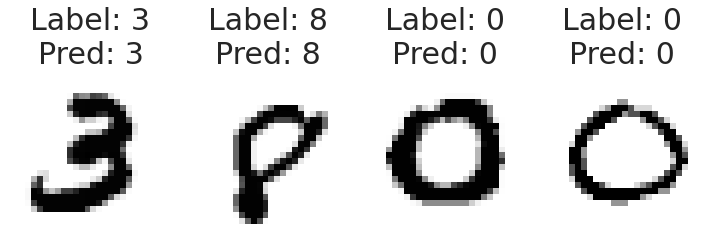

In [23]:
plot_examples(_data["correct"])